### Importing the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Loading the Database

In [3]:
train_link = "https://drive.google.com/file/d/1TKxXj7yaa9z9YAcLdYVIcd5E_tWX9639/view?usp=sharing"
test_link = "https://drive.google.com/file/d/1yuiul5wF3p2evoaJF4dy_EvIvGW3L0b8/view?usp=sharing"

#The ID of the files
train_id= train_link.split('/')[-2]
test_id = test_link.split('/')[-2]

#Prefix url
start_url ='https://drive.google.com/uc?id=' 

#The dataframe
df_train = pd.read_csv(start_url + train_id, index_col= 'id')
df_test = pd.read_csv(start_url + test_id, index_col= 'id')

# Removing any such row that has all the entries null in it
df_train.dropna(how='all', inplace=True)
df_test.dropna(how='all', inplace=True)

#Printing the shape of the database
print(df_train.shape)

(16108, 25)


### EDA

We look at the number of unique values in each columns to get an idea of a categorical and numerical variables.

In [4]:
print(df_train.nunique())

product_code          3
loading            9390
attribute_0           2
attribute_1           2
attribute_2           3
attribute_3           2
measurement_0        28
measurement_1        27
measurement_2        22
measurement_3      4282
measurement_4      4222
measurement_5      4220
measurement_6      4228
measurement_7      4254
measurement_8      4239
measurement_9      4219
measurement_10     4834
measurement_11     5961
measurement_12     5404
measurement_13     4887
measurement_14     5527
measurement_15     5989
measurement_16     6134
measurement_17    14508
failure               2
dtype: int64


Hence the **attributes** are *Categorical* columns and the **measurements** and **loading** are *numerical*

#### Making a Heat Map to see what are the missing values in the dataframe 

<AxesSubplot:ylabel='id'>

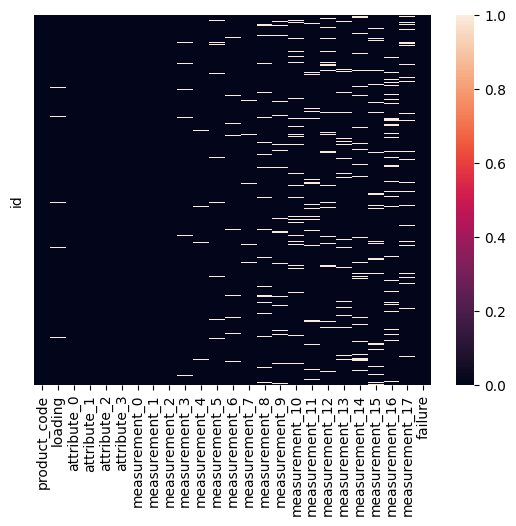

In [5]:
sns.heatmap(df_train.isnull(),yticklabels=False)

As we can see that the missing values are the **'measurements'** and **'loading'** which are both numerical data. <br>
So we would use the **mean** to fill them. <br>

Obeserving the mean of the data by grouping them using product_code

In [6]:
df_train.groupby(['product_code']).mean()

,loading,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
product_code,,,,,,,,,,,,,,,,,,,,,
A,127.469361,9.0,5.0,10.325882,4.229412,5.226078,17.808524,11.716103,17.143195,17.505004,...,11.436477,16.124386,19.439558,12.249168,15.585325,16.110886,14.456503,16.410397,702.646048,0.227255
B,127.318714,8.0,8.0,5.932381,8.450857,7.755810,17.788591,11.719726,17.132742,17.504576,...,11.422008,16.089866,19.102725,11.913037,15.921265,16.103636,15.109736,16.727455,701.089888,0.200381
C,128.125714,5.0,8.0,7.541160,8.773185,5.565300,17.791632,11.747230,17.131303,17.500103,...,11.430743,16.131756,18.784288,11.244895,15.571511,16.104554,15.466860,16.394287,700.741309,0.211532


Since the Mean of different products is different, hence replace the missing values by the mean of the corresponding product_code.

<AxesSubplot:ylabel='id'>

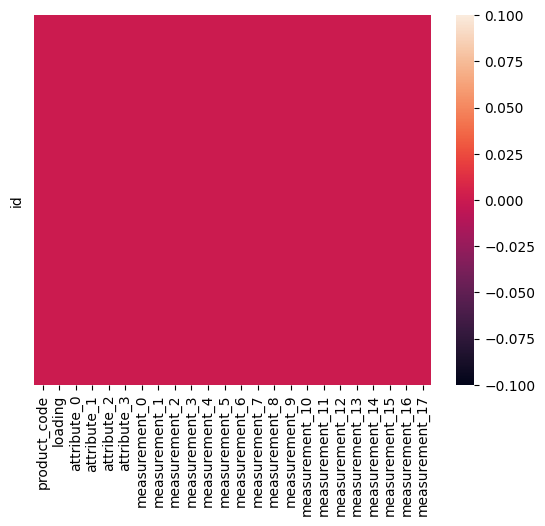

In [7]:
missing_columns = ['loading']
for a in range(3,18):
    missing_columns.append(f"measurement_{a}")

df_train[missing_columns] = df_train[missing_columns].fillna(df_train.groupby('product_code')[missing_columns].transform('mean'))
df_test[missing_columns] = df_test[missing_columns].fillna(df_test.groupby('product_code')[missing_columns].transform('mean'))
sns.heatmap(df_test.isnull() ,yticklabels=False)

#### Selecting the Features that are most relevant and Scaling the required features

Making a histogram of all the attributes in the training dataset for their different failure values and the testing dataset to look for similarities

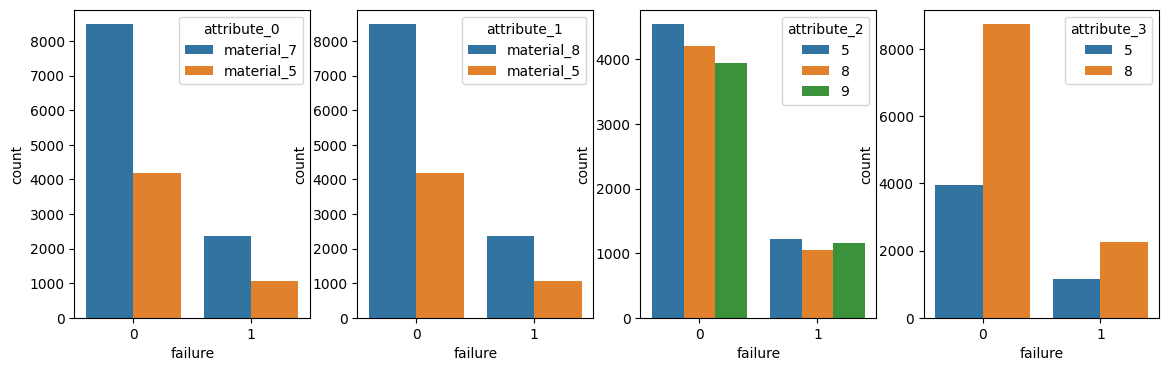

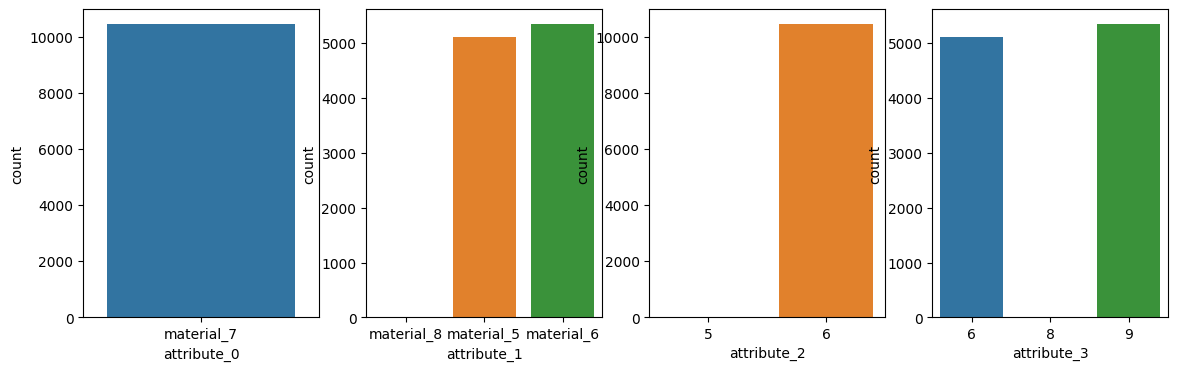

In [8]:
plt.figure(figsize=(14,4))
for a in range(0,4):
    plt.subplot(1,4,a+1)
    sns.countplot(x='failure',hue=f'attribute_{a}',data=df_train)
plt.show()

plt.figure(figsize=(14,4))
for a in range(0,4):
    plt.subplot(1,4,a+1)
    sns.countplot(x=f'attribute_{a}',data=df_test)
plt.show()



The **product_code** is irrelevant to the determination of the failure since the values are different in test and train sets.The features **attributes-2** and **attributes-3** are also irrelevant to the determination of the failure of the product,since both train and test have only few values common for these.<br><br><br>
Since the feature **attribute_1** is categorical and the common values present in test and train for this column is *material_5* so we do a one-hot encoding of *material_5* from the feature **attribute_1**.<br><br><br>
The feature **attribute_0** has only a single value *material_7* in the test dataset so we do a one-hot encoding of *material_7* from the feature **attribute_1** 

In [9]:
attribute_0_tr = pd.get_dummies(df_train['attribute_0'])
attribute_1_tr = pd.get_dummies(df_train['attribute_1'])

attribute_0_te = pd.get_dummies(df_test['attribute_0'])
attribute_1_te = pd.get_dummies(df_test['attribute_1'])

#Dropping the other columns from the attributes in the train
attribute_0_tr.drop('material_5', axis=1, inplace=True)
attribute_1_tr.drop('material_8', axis=1, inplace=True)

#Dropping the other columns from the attributes in the test
attribute_1_te.drop('material_6', axis=1, inplace=True)
attribute_1_te.drop('material_8',axis=1,inplace=True)

df_train = pd.concat([df_train, attribute_0_tr, attribute_1_tr], axis=1)
df_test = pd.concat([df_test, attribute_0_te, attribute_1_te ], axis=1)


df_train.drop(['product_code', 'attribute_0', 'attribute_1', 'attribute_2', 'attribute_3'],axis=1, inplace=True)
df_test.drop(['product_code', 'attribute_0', 'attribute_1', 'attribute_2', 'attribute_3'],axis=1, inplace=True)
df_test.describe()

,loading,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6,measurement_7,measurement_8,...,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,material_7,material_5
count,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,...,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.0,10462.000000
mean,128.090251,6.672816,9.776811,6.387020,17.784655,11.737575,17.115965,17.522536,11.705345,19.026104,...,16.120592,19.291404,11.583286,15.596392,15.958839,14.941637,16.389498,700.979989,1.0,0.488626
std,38.807460,3.425544,3.990475,3.373706,0.988181,0.981245,0.980863,0.973046,0.980522,0.984146,...,1.628395,1.254880,1.529840,0.956622,1.457351,1.288186,1.582518,132.800503,0.0,0.499894
min,39.450000,0.000000,0.000000,0.000000,14.306000,8.250000,13.687000,12.715000,7.968000,15.217000,...,9.323000,14.751000,5.167000,12.115000,9.792000,9.104000,9.701000,196.787000,1.0,0.000000
25%,100.200000,4.000000,7.000000,4.000000,17.116250,11.082000,16.453250,16.879000,11.058000,18.380000,...,15.018250,18.492250,10.578250,14.984250,14.996250,14.149000,15.372500,615.959500,1.0,0.000000
50%,123.340000,6.000000,9.000000,6.000000,17.781000,11.736000,17.117063,17.524651,11.699968,19.020883,...,16.124500,19.270000,11.573798,15.598442,15.987500,14.921000,16.450000,701.625000,1.0,0.000000
75%,149.527500,9.000000,12.000000,8.000000,18.446750,12.390000,17.779000,18.154000,12.335000,19.678750,...,17.217000,20.070750,12.555000,16.212000,16.992000,15.719000,17.444000,786.216250,1.0,1.000000
max,346.970000,27.000000,29.000000,24.000000,21.267000,15.281000,20.620000,21.329000,15.419000,23.807000,...,21.761000,24.973000,17.663000,19.371000,20.284000,20.294000,22.696000,1312.794000,1.0,1.000000


##### Scaling the dataset

In [10]:
from sklearn.preprocessing import StandardScaler    
st_x_train= StandardScaler()    

features_to_scale = ['loading']
for a in range(0,18):
    features_to_scale.append(f'measurement_{a}')
    
st_x_train.fit(df_train[features_to_scale])

df_train[features_to_scale]= pd.DataFrame(data=st_x_train.transform(df_train[features_to_scale]), columns= features_to_scale)
df_train


,loading,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6,measurement_7,measurement_8,...,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure,material_7,material_5
id,,,,,,,,,,,,,,,,,,,,,
0,-1.223434,-0.202224,0.191481,-0.665457,0.244566,0.798387,-1.408105,1.814342,0.015280,1.141123,...,-0.936199,2.467575,-0.547211,0.003250,-1.239770,-1.087968,0.584937,0,1,0
1,-1.100202,1.373260,-1.051115,-0.971859,0.417960,-0.190510,0.590082,0.395435,1.040070,-1.144705,...,-0.736058,-0.018530,-0.793129,-0.478591,-0.394658,-0.523100,-0.181162,0,1,0
2,-1.163490,0.923122,-1.548154,-0.359055,0.261605,-0.077262,-0.403430,0.747373,1.009600,-0.742214,...,0.214491,1.458815,0.845495,1.773654,-0.581564,0.857756,-0.355601,0,1,0
3,-0.683943,1.148191,-1.299634,-0.052652,-0.502129,-0.546432,1.461815,0.847781,0.872488,0.036541,...,-0.448005,-1.273153,-0.364222,-0.382347,0.697592,0.396079,1.165578,0,1,0
4,1.554029,0.247914,-1.299634,0.560153,1.553539,1.235200,-0.147695,-1.782115,-0.424495,-0.938920,...,0.521525,0.468133,0.407480,-2.350778,-1.165877,-0.057248,-1.135221,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16103,0.489969,0.247914,0.937038,-0.359055,-1.205727,1.364626,1.352214,1.510073,0.244817,1.542605,...,-0.923729,-0.969440,-0.098009,0.868119,1.311090,-0.064405,2.136996,0,1,0
16104,-0.264340,0.698053,0.440000,-0.359055,0.730670,-0.024683,0.307961,-0.482887,0.206222,-0.595945,...,-0.076403,-0.419865,-0.417214,-0.652813,-0.969036,-0.661484,-0.068072,0,1,0
16105,-0.522636,0.472983,-1.299634,-0.971859,0.223519,-0.212755,1.270013,-0.195860,1.379296,-0.367968,...,0.797108,2.343198,1.213957,-0.144197,0.430584,0.322711,0.900815,0,1,0


In [11]:
from sklearn.preprocessing import StandardScaler    
st_x_test = StandardScaler()

a = df_test[features_to_scale].copy()
a.reset_index(level =['id'], inplace=True)

st_x_test.fit(a[features_to_scale])

a[features_to_scale]= pd.DataFrame(data=st_x_test.transform(a[features_to_scale]), columns= features_to_scale)

a.set_index(['id'], inplace=True)

df_test[features_to_scale] = a[features_to_scale]
df_test.describe()

,loading,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6,measurement_7,measurement_8,...,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,material_7,material_5
count,1.046200e+04,1.046200e+04,1.046200e+04,1.046200e+04,1.046200e+04,1.046200e+04,1.046200e+04,1.046200e+04,1.046200e+04,1.046200e+04,...,1.046200e+04,1.046200e+04,1.046200e+04,1.046200e+04,1.046200e+04,1.046200e+04,1.046200e+04,1.046200e+04,10462.0,10462.000000
mean,2.044288e-16,-1.086664e-16,-1.093456e-16,1.086664e-16,-7.097277e-16,-1.200764e-15,-2.499328e-15,-2.581762e-15,-5.993634e-16,1.245589e-15,...,6.574320e-16,-1.032331e-15,2.173329e-17,-2.288447e-15,-1.638147e-15,1.564797e-15,-9.236648e-16,-5.277114e-16,1.0,0.488626
std,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,...,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,0.0,0.499894
min,-2.284213e+00,-1.948051e+00,-2.450154e+00,-1.893267e+00,-3.520431e+00,-3.554406e+00,-3.496031e+00,-4.940944e+00,-3.811768e+00,-3.870652e+00,...,-4.174611e+00,-3.618372e+00,-4.194289e+00,-3.639428e+00,-4.231744e+00,-4.531888e+00,-4.226694e+00,-3.796801e+00,1.0,0.000000
25%,-7.187171e-01,-7.802976e-01,-6.958930e-01,-7.075702e-01,-6.764322e-01,-6.681374e-01,-6.756769e-01,-6.613941e-01,-6.602355e-01,-6.565443e-01,...,-6.769823e-01,-6.368679e-01,-6.569859e-01,-6.399303e-01,-6.605380e-01,-6.153419e-01,-6.426764e-01,-6.402427e-01,1.0,0.000000
50%,-1.224115e-01,-1.964208e-01,-1.946757e-01,-1.147220e-01,-3.699265e-03,-1.605102e-03,1.118998e-03,2.173135e-03,-5.483823e-03,-5.305573e-03,...,2.399951e-03,-1.705768e-02,-6.201632e-03,2.143047e-03,1.966717e-02,-1.602096e-02,3.823325e-02,4.857221e-03,1.0,0.000000
75%,5.524266e-01,6.793944e-01,5.571504e-01,4.781263e-01,6.700457e-01,6.649272e-01,6.760030e-01,6.489869e-01,6.421940e-01,6.631910e-01,...,6.733379e-01,6.210818e-01,6.352042e-01,6.435527e-01,7.089646e-01,6.034843e-01,6.663763e-01,6.418676e-01,1.0,1.000000
max,5.640416e+00,5.934285e+00,4.817498e+00,5.220912e+00,3.524164e+00,3.611326e+00,3.572569e+00,3.912093e+00,3.787607e+00,4.858146e+00,...,3.463949e+00,4.527819e+00,3.974274e+00,3.945954e+00,2.967966e+00,4.155159e+00,3.985297e+00,4.607236e+00,1.0,1.000000


### Splitting the training and testing data for the given train dataset

In [12]:
from sklearn.model_selection import train_test_split

#The target variable and the features dataset
X = df_train.drop('failure', axis=1)
y = df_train['failure']

#Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, train_size=0.9, shuffle=True, random_state=69420) 
X_train

,loading,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6,measurement_7,measurement_8,...,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,material_7,material_5
id,,,,,,,,,,,,,,,,,,,,,
556,-0.419472,-0.427293,-0.305558,-0.665457,-2.608913,-0.777983,-0.588128,0.171291,-0.741378,-1.000454,...,1.240187,1.209860,-1.001258,-0.771601,0.106599,-0.240042,-0.962707,-1.289201,1,0
1868,-0.076791,-0.427293,-0.802596,-0.971859,-1.143586,-0.323981,0.201405,0.787942,-1.916483,0.850603,...,0.007328,0.207285,-1.291954,0.202134,0.699517,1.848832,1.281854,0.414205,1,0
7434,0.447520,1.148191,-0.305558,-0.359055,-0.898028,-0.638446,-0.655106,0.091166,0.243801,-2.060651,...,1.591432,-1.355809,0.368342,1.384527,-0.912742,-0.639312,-0.566047,-0.278247,0,1
964,-0.312963,2.273537,-1.796673,-0.665457,-0.714612,-0.703159,-2.409736,0.519171,-0.932320,1.511334,...,1.347346,-1.478013,-0.150139,-0.432118,-0.096426,0.500130,-0.326857,-0.437419,1,0
12517,-1.307046,0.923122,-0.057038,2.704969,0.939143,0.108788,0.123263,-0.980874,-0.771847,1.496203,...,-0.079749,0.290210,-1.701966,-0.832873,-0.640168,0.707527,0.453937,1.110981,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5194,-1.220089,0.022845,-0.305558,-0.665457,-0.432972,0.092610,-1.159474,-1.077225,-0.278242,0.963583,...,-0.452256,-1.602088,-1.148052,1.172557,1.170198,-1.006914,1.064735,-0.783738,0,1
7209,-1.123356,0.022845,2.179634,1.785762,0.146343,0.543579,-1.486247,-1.020429,1.550941,-0.007844,...,3.137593,0.264646,-0.256439,-0.618420,0.824564,-0.318281,-0.794499,1.189371,0,1
8781,-0.963593,0.923122,-0.554077,-0.052652,0.942150,-0.679902,-1.607011,-0.766871,1.181245,0.173731,...,0.921259,-0.290261,-0.424927,0.223662,0.031431,0.559120,1.269925,0.480027,0,1


### Fitting the data into different models

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import HistGradientBoostingClassifier

models = []

#Gradient boosting
hgbmodel = HistGradientBoostingClassifier()
hgbmodel.fit(X_train, y_train)
models.append(hgbmodel)

#SVM
svmmodel=SVC(probability=True)
svmmodel.fit(X_train, y_train)
models.append(svmmodel)

#DECISION TREE MODEL
dtmodel = DecisionTreeClassifier()
dtmodel.fit(X_train, y_train)
models.append(dtmodel)

#Naive Bayes Gaussian
gnbmodel = GaussianNB()
gnbmodel.fit(X_train, y_train)
models.append(gnbmodel)

#KNN
knnmodel = KNeighborsClassifier(n_neighbors=3)
knnmodel.fit(X_train, y_train)
models.append(knnmodel)

#Logistic Regression
logmodel = LogisticRegression(max_iter=1000, random_state=69420)
logmodel.fit(X_train, y_train)
models.append(logmodel)

#XGBOOST Model
xgbmodel = XGBClassifier()
xgbmodel.fit(X_train, y_train)
models.append(xgbmodel)

#Random Forest
rndfmodel = RandomForestClassifier()
rndfmodel.fit(X_train, y_train)
models.append(rndfmodel)

### Making the predictions from the model

In [14]:
#Making the predictions from the Model (Calculating the confusion matrix for all the models)
from sklearn.metrics import confusion_matrix
for a in models:
    y_cap = a.predict(X_test)
    print(f'Confusion Matrix for {a}'.split('(')[0] + " is:")
    print(confusion_matrix(y_test, y_cap))

Confusion Matrix for HistGradientBoostingClassifier is:
[[1279    0]
 [ 332    0]]
Confusion Matrix for SVC is:
[[1279    0]
 [ 332    0]]
Confusion Matrix for DecisionTreeClassifier is:
[[1037  242]
 [ 243   89]]
Confusion Matrix for GaussianNB is:
[[1263   16]
 [ 317   15]]
Confusion Matrix for KNeighborsClassifier is:
[[1120  159]
 [ 300   32]]
Confusion Matrix for LogisticRegression is:
[[1277    2]
 [ 330    2]]
Confusion Matrix for XGBClassifier is:
[[1244   35]
 [ 318   14]]
Confusion Matrix for RandomForestClassifier is:
[[1277    2]
 [ 332    0]]


#### Evaluating the Models (Evaluation Metric: Area under ROC)

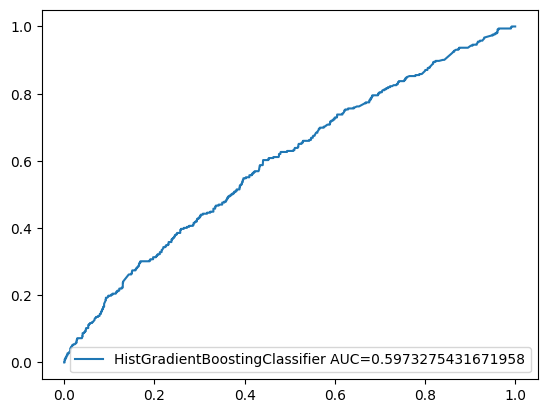

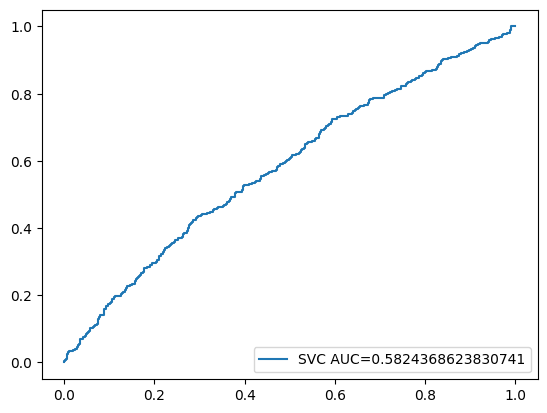

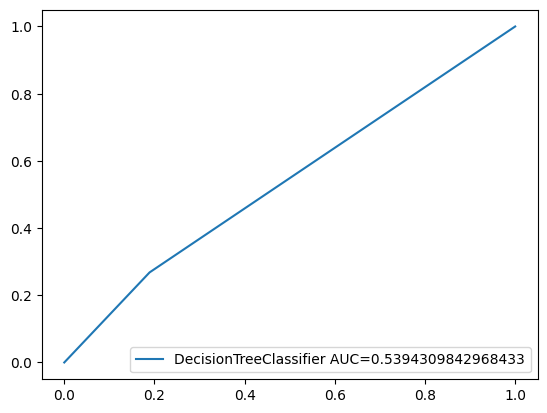

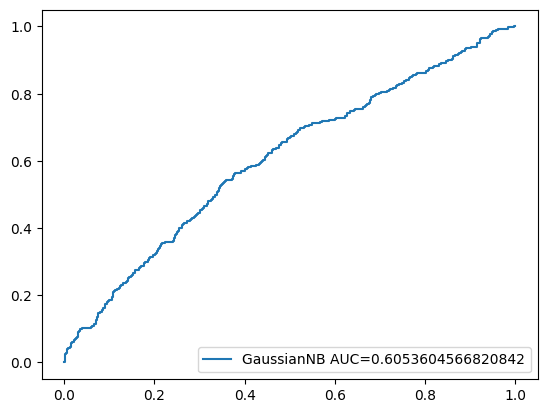

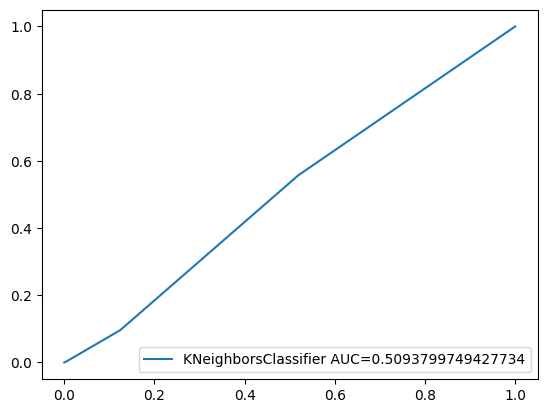

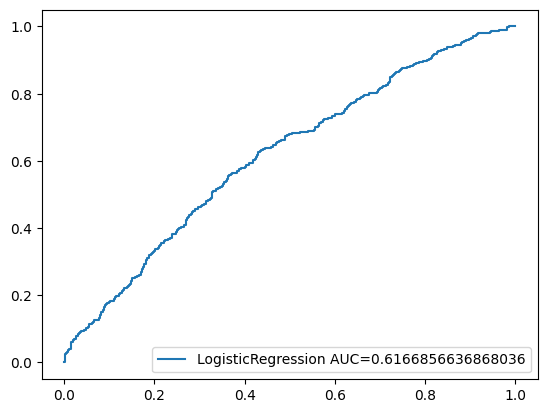

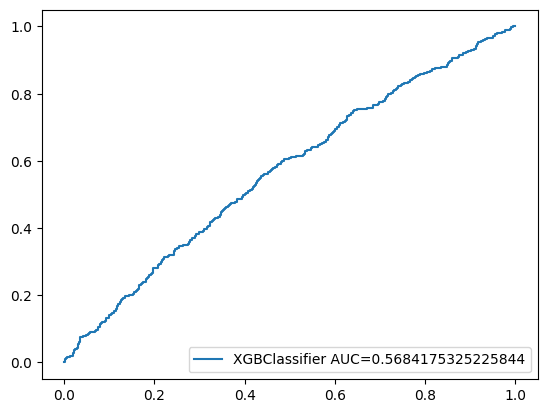

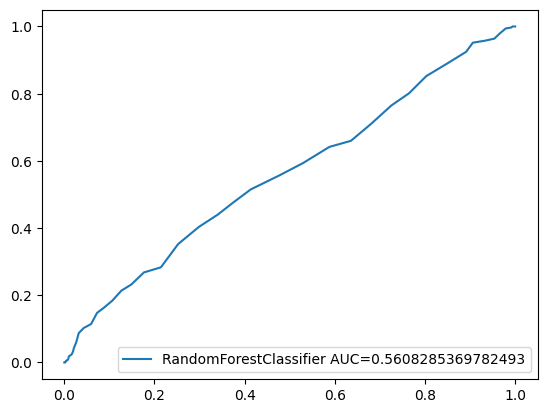

In [15]:
from sklearn.metrics import classification_report
from sklearn import metrics

for a in models:
    y_pred_proba = a.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr,tpr,label=f"{a}".split('(')[0] + " AUC="+str(auc))
    plt.legend(loc=4)
    plt.show()


The logistic regression model works well for this dataset and the type of distribution done in it.

#### Training on the complete Dataset (using Logistic regression)

In [16]:
#Logistic Regression

#The target variable and the features dataset
X_total = df_train.drop('failure', axis=1)
y_total = df_train['failure']

final_model = LogisticRegression(max_iter=1000, random_state=69420)
final_model.fit(X_total, y_total)

y_pred_proba = final_model.predict_proba(df_test)[::,1]
# print(df_test.index)
final_results = pd.DataFrame(data={'id':df_test.index,'failure':y_pred_proba })
final_results.to_csv('results.csv', index=False)

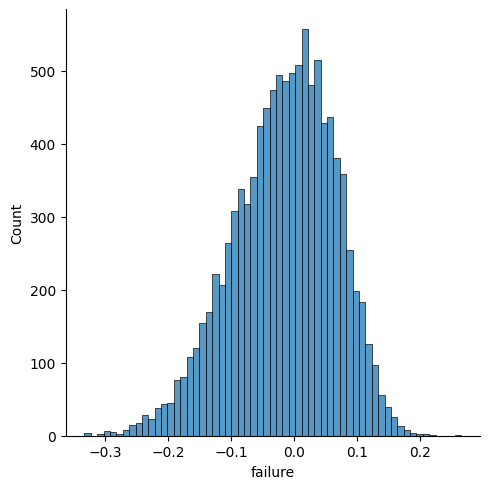

In [4]:
import pandas as pd
import seaborn as sns
aki = pd.read_csv('results_atishay.csv')
av = pd.read_csv('results_210050015.csv')
# fpr, tpr, _ = metrics.roc_curve(,  y_pred_proba)
# auc = metrics.roc_auc_score(aki['1'], y_pred_proba)
# plt.plot(fpr,tpr,label=f"{a}".split('(')[0] + " AUC="+str(auc))
# plt.legend(loc=4)
# plt.show()
sns.displot(av['failure'] - aki['failure'])